In [ ]:
#Loan Prediction

#Problem Statement:
#Automate the Loan eligibility process based on the details provided by the customers.

#Given a train dataset and test dataset.

#The path to solve of the problem can be divided as follows:
#1) Data cleaning (Fill the empty and null values appropriately)
#2) Data Visualization
#3) Train the model using Machine Learning Algorithm
#4) Predict the accuracy with the best Algorithm selected.

#Which Algorithm to choose?

#The problem is to impute the correct values of the "Loan_Status" field based on the details entered by the customer on the test data

#We have to use Ensemble learning as the problem is to impute the correct values

#We have two choices of Ensemblers: Gradient Boosting or Random Forest.

#Let's first train the model using Gradient Boosting. Here the predictors are selected incrementally, leading to low bias and variance.
#In GBM, subsequent predictors learn from the mistakes of the previous predictors.


In [1]:
#System level library
import sys

#Library for scientific computation
import scipy

#Library for graph plotting (For visualization)
import matplotlib

#Library to perform vector/array operation
import numpy

#Library for analyzing tabular data
import pandas

#Library for machine learning algorithm
import sklearn

#Library to plot heatmap to get an insight of relation between numerical attributes
import seaborn

In [2]:
#Importing necessary libraries

from pandas.plotting import scatter_matrix

from matplotlib import pyplot as plt

from sklearn import model_selection

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#Loading the data set

trainurl = "/Users/ayushjain/Downloads/Loan Prediction Project/train.csv"

testurl = "/Users/ayushjain/Downloads/Loan Prediction Project/test.csv"

traindata = pandas.read_csv(trainurl)

testdata = pandas.read_csv(testurl)

totaldata = pandas.concat([traindata, testdata], sort=False)

In [4]:
#Analyzing the structure of the data

print(totaldata.shape)

print(totaldata.ndim)

#Let's take a look at the dataset

totaldata.head(10)

#Checking what percent of the toal customers got the Loan Approved
totaldata.groupby('Loan_Status').size()

#We see that 68.7% customers got Loan Approved i.e. 422/(422+192)


(981, 13)
2


Loan_Status
N    192
Y    422
dtype: int64

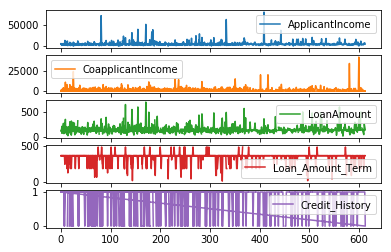

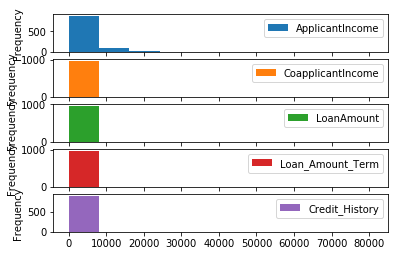

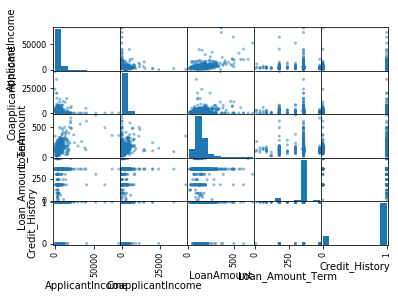

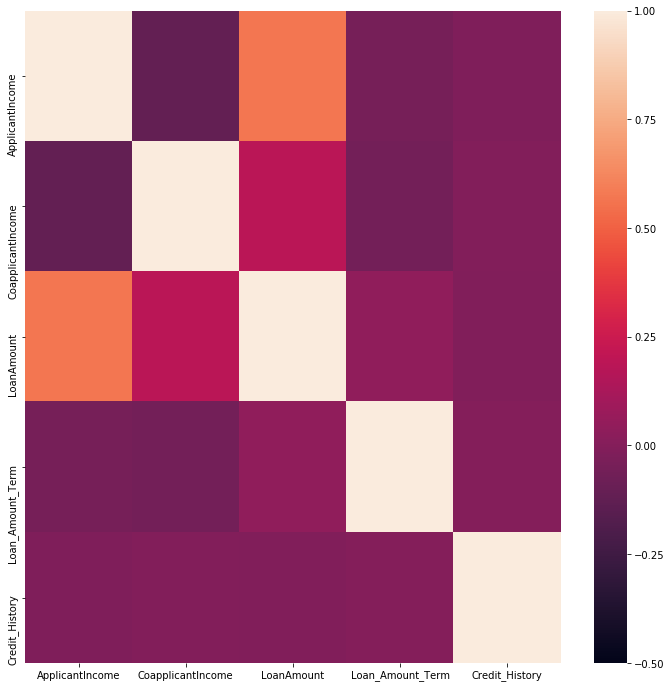

In [5]:
#Visualize the data by plotting univariate and multivariate plots

#By plotting we get an idea how the numerical variables/attrubutes are related to each other.
#In our dataset we have "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History" as numerical variables.
#Plotting Line for each variable
totaldata.plot(kind='line', subplots = True, sharex = False, sharey = False)

#Plotting histogram for each variable
totaldata.plot(kind='hist', subplots = True, sharex = False, sharey = False)

#Plotting pair-wise scatter plots to get relationship between each variable
#Using pandas scatter_matrix library
scatter_matrix(totaldata)


#The scatter matrix is not useful and we couldn't get enough info about the relationship
#So we will plot heatmap from seaborn library

#From the train dataset select only integer and float types and then plot heatmap on these variables
numericdata = traindata.select_dtypes(include = ['int64', 'float64'])

#For better scale
plt.figure(figsize=(12, 12))
seaborn.heatmap(numericdata.corr(), vmax = 1, vmin = -0.5)
plt.show()

#From the heatmap we see that ApplicantIncome and LoanAmount are positively correlated. 
#Also, CoapplicantIncome and LoanAmount are also positively correlated.


In [6]:
#Check if the dataset has any null values
print(totaldata.isnull().values.any())

#The dataset does contain some null values. 
#We have to remove all the null values by applying some Data Clenaing techniques.

#Let's print the count of null values for each variable.
print(totaldata.isnull().sum())

True
Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64


In [8]:
#Data Cleaning - 1

#Let's first remove null values from Gender attribute

#We see that there are 24 null values present in Gender.
#Logic : Replace Null values with the term 'Unkown'

traindata.Gender = traindata.Gender.fillna(value = 'Unknown')
testdata.Gender = testdata.Gender.fillna(value = 'Unknown')

print(traindata.Gender.isnull().sum(), testdata.Gender.isnull().sum())

#Now all the Null values has been removed from the Gender attribute.

0 0


In [12]:
#Data Cleaning - 2

#We see that 3 null values are present in the 'Married' attribute. Perform the same operation as done for Gender.

traindata.Married = traindata.Married.fillna(value = 'Unknown')
testdata.Married = testdata.Married.fillna(value = 'Unknown')

print(traindata.Married.isnull().sum(), testdata.Married.isnull().sum())
#We have removed null values from Married attribute as well.

#Let's remove the null values from 'Dependents' attribute.
#We see that for 'Dependents' attribute, the values are not correctly entered. 
#First replace '3+' with '3' and then fill null values with 'Unknown' value.
traindata.Dependents = traindata.Dependents.replace(to_replace='3+', value = '3')
testdata.Dependents = testdata.Dependents.replace(to_replace='3+', value = '3')
traindata.Dependents = traindata.Dependents.fillna(value = 'Unknown')
testdata.Dependents = testdata.Dependents.fillna(value = 'Unknown')

print(traindata.Dependents.isnull().sum(), testdata.Dependents.isnull().sum())

#We have cleaned and removed the null values of 'Depenedents' attribute.
traindata.head(20)

0 0
0 0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [18]:
#Data Cleaning - 3

#We see that 55 Self_Employed entries are null. Impute with 'Unknown' values

traindata.Self_Employed = traindata.Self_Employed.fillna(value = 'Unknown')
testdata.Self_Employed = testdata.Self_Employed.fillna(value = 'Unknown')

print(traindata.Self_Employed.isnull().sum(), testdata.Self_Employed.isnull().sum())

0 0


In [22]:
#Data Cleaning - 4

#Now let's see which all attributes have null values

print(traindata.isnull().sum())

print(testdata.isnull().sum())

#We have total of 22+5 null entries for LoanAmount. Let's impute these values with the LoanAmount mean respectively for both training and testdata set

traindata.LoanAmount = traindata.LoanAmount.fillna(value = traindata.LoanAmount.mean())
testdata.LoanAmount = testdata.LoanAmount.fillna(value = testdata.LoanAmount.mean())

print(traindata.LoanAmount.isnull().sum(), testdata.LoanAmount.isnull().sum())

#Here we see that LoanAmount null values has been imputed with mean() values.
print(traindata.isnull().sum(), testdata.isnull().sum())


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
0 0
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 Loan_ID               0
Gender               

In [23]:
#Data Cleaning - 5

#Now let's impute the values for Loan_Amount_Term with the mean as done above.

traindata.Loan_Amount_Term = traindata.Loan_Amount_Term.fillna(value = traindata.Loan_Amount_Term.mean())
testdata.Loan_Amount_Term = testdata.Loan_Amount_Term.fillna(value = testdata.Loan_Amount_Term.mean())

print(traindata.Loan_Amount_Term.isnull().sum(), testdata.Loan_Amount_Term.isnull().sum())

0 0


In [37]:
#Data Cleaning - 6

#Let's take a look at the data again and see what all attributes are left to clean up.

print(traindata.isnull().sum(), testdata.isnull().sum())
#We are oonly left with Credit_History to imput ethe values.

#Let's take a look at the data
#We see that the Credit_History is imputed with either 1.0 or 0.0 which doesn't make much sense.
#Instead change/replace these values with Yes or No respectively.

traindata.Credit_History = traindata.Credit_History.replace(to_replace = 1.0, value = 'Yes')
traindata.Credit_History = traindata.Credit_History.replace(to_replace = 0.0, value = 'No')
testdata.Credit_History = testdata.Credit_History.replace(to_replace = 1.0, value = 'Yes')
testdata.Credit_History = testdata.Credit_History.replace(to_replace = 0.0, value = 'No')

#Now impute the null values present in Credit_History with 'Unknown' value.

traindata.Credit_History = traindata.Credit_History.fillna(value = 'Unknown')
testdata.Credit_History = testdata.Credit_History.fillna(value = 'Unknown')

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [40]:
#Printing if null values present:

#print(traindata.isnull().sum(), testdata.isnull().sum())

#Tada...we have imputed all the values with respective statistics and removed all the null values.

#Now let's combine the traindata and testdata to totaldata.

totaldata = pandas.concat([traindata, testdata], sort = True)

totaldata.head(10)


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,Yes,0,Graduate,Male,146.412162,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,Yes,1,Graduate,Male,128.000000,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,Yes,0,Graduate,Male,66.000000,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,Yes,0,Not Graduate,Male,120.000000,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,Yes,0,Graduate,Male,141.000000,360.0,LP001008,Y,No,Urban,No
5,5417,4196.0,Yes,2,Graduate,Male,267.000000,360.0,LP001011,Y,Yes,Urban,Yes
6,2333,1516.0,Yes,0,Not Graduate,Male,95.000000,360.0,LP001013,Y,Yes,Urban,No
7,3036,2504.0,No,3,Graduate,Male,158.000000,360.0,LP001014,N,Yes,Semiurban,No
8,4006,1526.0,Yes,2,Graduate,Male,168.000000,360.0,LP001018,Y,Yes,Urban,No
9,12841,10968.0,Yes,1,Graduate,Male,349.000000,360.0,LP001020,N,Yes,Semiurban,No


In [42]:
#Now we have the clean data

totaldata.isnull().sum()

#Here 367 null entries are the values which we have to compute.

#Export the correct train and test data to some other file and perform data visualization and build the model using that files.

traindata.to_csv('cleaned_train_data.csv', index = False)
testdata.to_csv('cleaned_test_data.csv', index = False)
